In [10]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [13]:
local_zip = '/content/sample_data/elephants.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [14]:
source_path = '/tmp/dataset'

source_path_test = os.path.join(source_path, 'test')
source_path_train = os.path.join(source_path, 'train')

In [73]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      target_size=(100, 100))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='binary',
                                                                target_size=(100, 100))
  ### END CODE HERE
  return train_generator, validation_generator

In [74]:
train_generator, validation_generator = train_val_generators(source_path_train, source_path_test)

Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [75]:
def create_model():
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(tf.keras.optimizers.RMSprop(),
                loss='binary_crossentropy',
                metrics=['acc']) 
  return model

In [76]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/50
17/17 [==============================] - 5s 270ms/step - loss: 1.6301 - acc: 0.4917 - val_loss: 0.6943 - val_acc: 0.4840
Epoch 2/50
17/17 [==============================] - 4s 235ms/step - loss: 0.6902 - acc: 0.5393 - val_loss: 0.7096 - val_acc: 0.5160
Epoch 3/50
17/17 [==============================] - 4s 235ms/step - loss: 0.6432 - acc: 0.6464 - val_loss: 0.6080 - val_acc: 0.6915
Epoch 4/50
17/17 [==============================] - 4s 234ms/step - loss: 0.6200 - acc: 0.6798 - val_loss: 0.6034 - val_acc: 0.6543
Epoch 5/50
17/17 [==============================] - 4s 234ms/step - loss: 0.5653 - acc: 0.7167 - val_loss: 0.5445 - val_acc: 0.7074
Epoch 6/50
17/17 [==============================] - 4s 236ms/step - loss: 0.5301 - acc: 0.7560 - val_loss: 0.5740 - val_acc: 0.6968
Epoch 7/50
17/17 [==============================] - 4s 235ms/step - loss: 0.4984 - acc: 0.7798 - val_loss: 0.5539 - val_acc: 0.6915
Epoch 8/50
17/17 [==============================] - 4s 241ms/step - loss: 0.

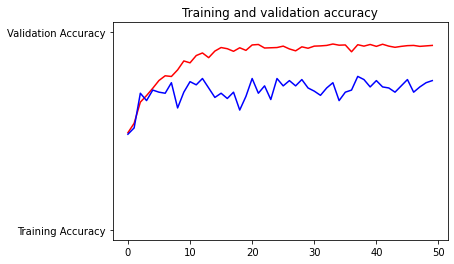

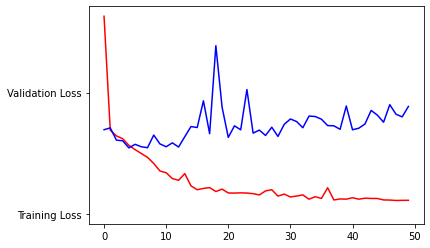

In [77]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

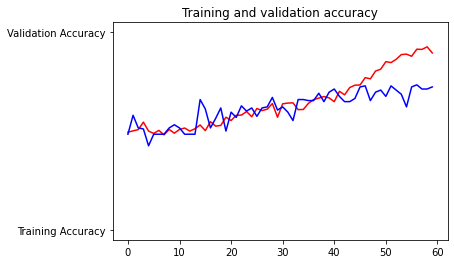

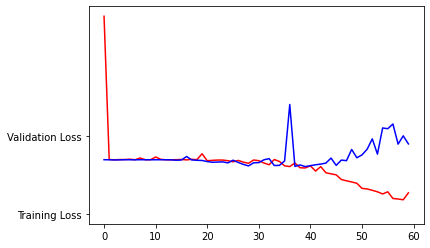

In [42]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()